In [1]:
import numpy as np
import pandas as pd

size = 1_000
x1 = np.random.rand(size)
w1 = np.random.rand(size)

x2 = np.random.normal(size=size)
w2 = np.random.rand(size)

x3 = np.random.normal(loc=2, scale=0.5, size=size)
w3 = np.random.rand(size)

dfs = {
    'sig': pd.DataFrame({"x": x1, "y": w1}),
    'bkg': pd.DataFrame({"x": x2, "y": w2}),
    'sig2': pd.DataFrame({"x": x3, "y": w3}),
}

In [2]:
from quickstats.plots import VariableDistributionPlot
config = {
    'plot_format': 'hist',
    'combine_stacked_error' : False,
    'isolate_error_legend': True,
    'box_legend_handle': False
    
}
comparison_options = {
    'mode': 'ratio',
    'components': {
        'reference': 'dummy',
        'target': 'dummy2'
    }
}
label_map = {
    'sig': 'Signal',
    'bkg': 'Background',
    'stacked_0.error': 'Uncertainty',
    'sig.error': 'Signal Uncertainty',
    'bkg.error': 'Background Uncertainty',
}
plot_options = {
    'combined_signal': {
        'samples': ['sig', 'sig2'],
        'stack_index': 0
    },
    'bkg': {
        'plot_format': 'errorbar',
        'styles': {
            'color': 'k'
        },
        'stack_index': 1
    }
}
plotter = VariableDistributionPlot(dfs, config=config, plot_options=plot_options,
                                   color_cycle='atlas_hdbs', label_map=label_map)

[INFO] Using deduced bin range (-2.910, 4.061)


(<Axes: ylabel='test2'>, <Axes: xlabel='test [GeV]', ylabel='Difference'>)

<Figure size 640x480 with 0 Axes>

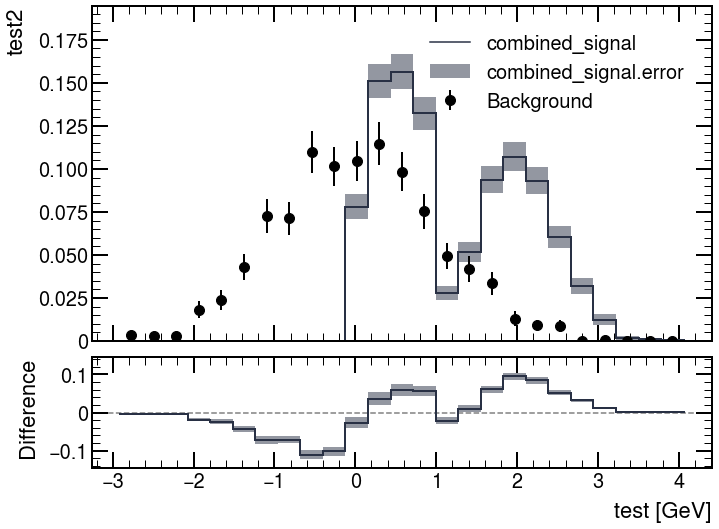

In [3]:
selection = 'x > 0.5'
selection = None
bin_range = (0.7, 1)
bin_range = None
comparison_options = {
    #'mode': lambda target, reference: (target - reference)/reference,
    'mode': 'difference',
    'components': [
       # {
       #     'reference': 'bkg',
       #     'target': 'sig'
       # },
       # {
       #     'reference': 'bkg',
       #     'target': 'sig2'
       # }
        {
            'reference': 'bkg',
            'target': 'combined_signal'
        }
    ]
}
plotter.draw("x", "y", show_error=True, normalize=True, stacked=True,
             selection=selection, xlabel='test', ylabel='test2', unit='GeV',
             bin_range=bin_range, clip_weight=True, divide_bin_width=False,
             ypad=0.1, variable_scale=1.0, 
             comparison_options=comparison_options)

In [6]:
from scipy.stats import norm, expon
import numpy as np
import pandas as pd

sample_size = {
    'data': 2000,
    'HH': 5,
    'H': 70,
    'ttyy': 20,
    'yybb': 1000,
    'yyj': 600,
    'yj': 280,
    'jj': 30,
}

MC_size = 100_000
signal_model = norm(125, 2)
background_model = expon(105, 20)

dfs = {}
for model, samples in [(signal_model, ['H', 'HH']),
                       (background_model, ['ttyy', 'yybb', 'yyj', 'yj', 'jj'])]:
    for sample in samples: 
        data = {
            'myy': model.rvs(MC_size),
            'weight': sample_size[sample] / MC_size
        }
        dfs[sample] = pd.DataFrame(data)
dfs['data'] = pd.DataFrame({
    'myy': np.concatenate([signal_model.rvs(70), background_model.rvs(1930)]),
    'weight': np.ones(2000)
})

<Axes: xlabel='$\\mathit{m}_{\\gamma\\gamma}$ [GeV]', ylabel='Events / 2.2 GeV'>

<Figure size 640x480 with 0 Axes>

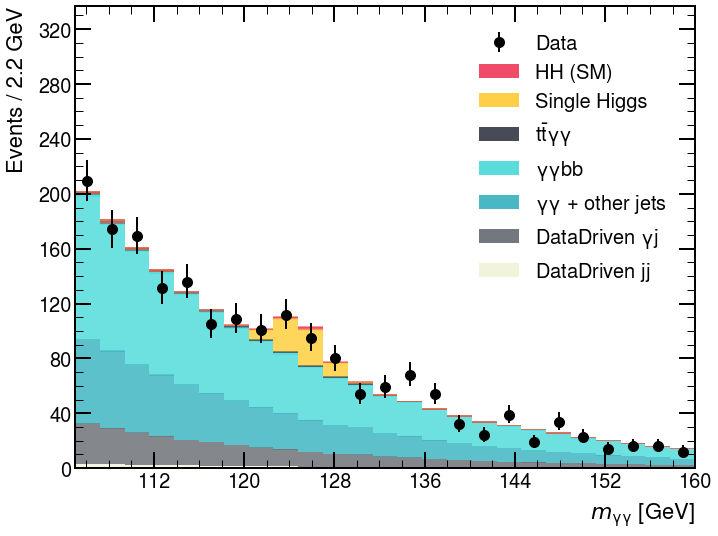

In [8]:
from quickstats.plots import VariableDistributionPlot

label_map = {
    'HH': 'HH (SM)',
    'H': 'Single Higgs',
    'ttyy': r'$t\bar{t}\gamma\gamma$',
    'yybb': r'$\gamma\gamma bb$',
    'yyj': r'$\gamma\gamma$ + other jets',
    'yj': r'DataDriven ${\gamma}j$',
    'jj': r'DataDriven $jj$',
    'data': 'Data'
}
color_map = {
    'data': 'k',
    'HH': '#f1385a',
    'H': '#ffcc33',
    'ttyy': '#343844',
    'yybb': '#49d9d9',
    'yyj':  '#35b2be',
    'yj': '#666970',
    'jj': '#f0f3d8',
}

plot_options = {
    'data': {
        'plot_format': 'errorbar', # data should be drawn as errorbar not histogram
        'error_format': 'errorbar',
        'show_error': True, #want to show error for data only
        'stack_index': 1 # we don't want it to be part of the stacked histograms
    }
}
styles = {
    'hist': {
        'histtype': 'stepfilled',
        'alpha': 0.8
    }
}

plotter = VariableDistributionPlot(dfs,
                                   plot_options=plot_options,
                                   color_map=color_map,
                                   label_map=label_map,
                                   styles=styles)
plotter.draw(
    'myy',
    'weight',
    xlabel=r'$\mathit{m}_{\gamma\gamma}$',
    unit='GeV',
    # the order determines the order or stacking
    targets=['data', 'jj', 'yj', 'yyj', 'yybb', 'ttyy', 'H', 'HH'],
    bin_range=(105, 160),
    normalize = False,
    stacked=True,
    show_error=True,
    xmin=105,
    xmax=160,
)